## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

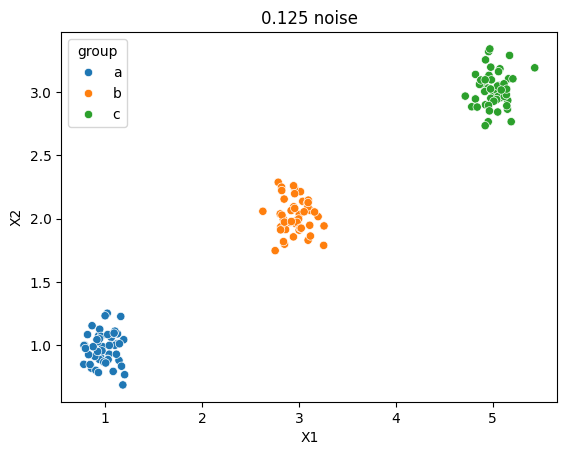

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

sns.scatterplot(data = df0_125,x = 'x1',y = 'x2',hue = 'group') #Seen from each of the scatterplots down below as the noise increases from 0.125 to 2.0, the visual distinctness of each of the clusters decreases and becomes less discernable
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('0.125 noise')
plt.show()


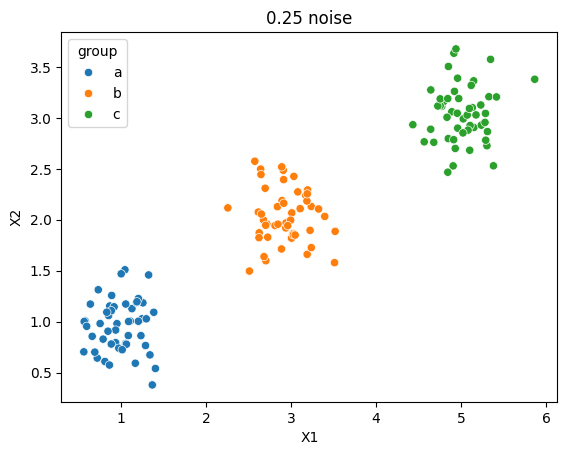

In [31]:
sns.scatterplot(data = df0_25,x = 'x1',y = 'x2',hue = 'group')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('0.25 noise')
plt.show()

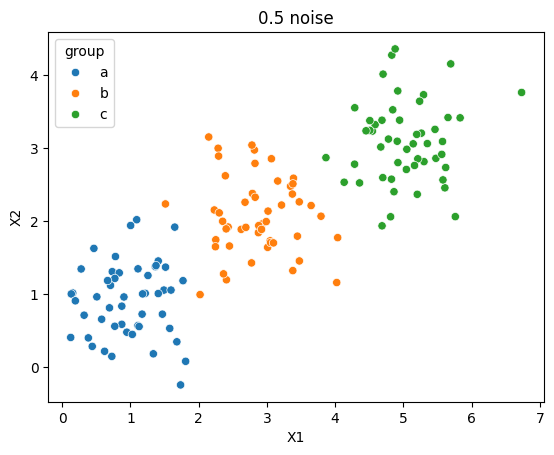

In [32]:
sns.scatterplot(data = df0_5,x = 'x1',y = 'x2',hue = 'group')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('0.5 noise')
plt.show()

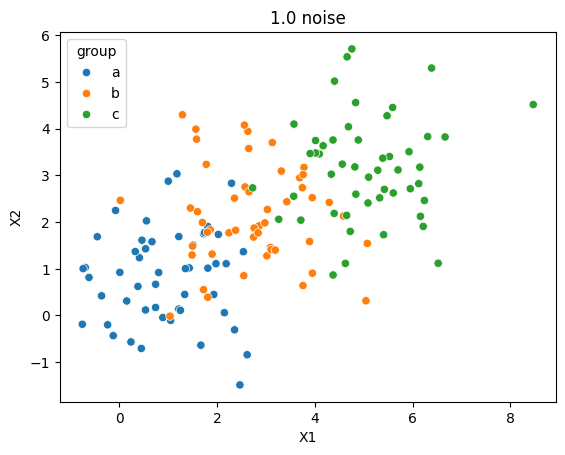

In [33]:
sns.scatterplot(data = df1_0,x = 'x1',y = 'x2',hue = 'group')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('1.0 noise')
plt.show()

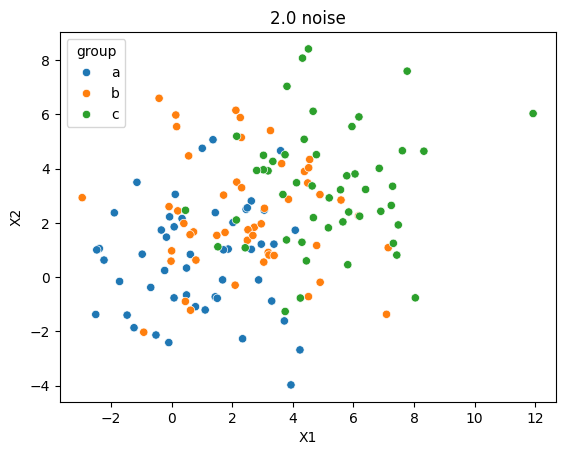

In [34]:
sns.scatterplot(data = df2_0,x = 'x1',y = 'x2',hue = 'group')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2.0 noise')
plt.show()

In [21]:
from sklearn.cluster import KMeans

def maxmin(X):
    X = np.asarray(X, dtype=float)
    rng = X.max(axis=0) - X.min(axis=0)
    rng[rng == 0] = 1.0
    return (X - X.min(axis=0)) / rng

def elbow_scree(df, dataset_name, k_bar=10):
    X = df[['x1','x2']].values
    X = maxmin(X)
    SSE = []
    for k in range(k_bar):
        model = KMeans(
            n_clusters=k+1,
            max_iter=300,
            n_init=10,
            random_state=0
        ).fit(X)
        SSE.append(model.inertia_)

    sns.lineplot(x=np.arange(1, k_bar+1), y=SSE).set_title(f'Elbow (SSE) – {dataset_name}')
    plt.xlabel('k (number of clusters)')
    plt.ylabel('SSE (inertia)')
    plt.grid(True)
    plt.show()

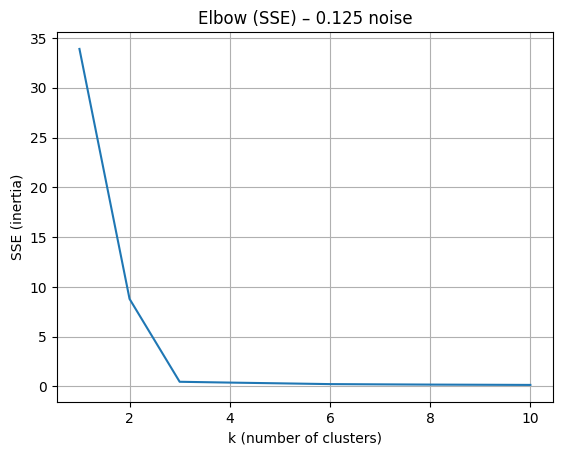

In [24]:
elbow_scree(df0_125, '0.125 noise')

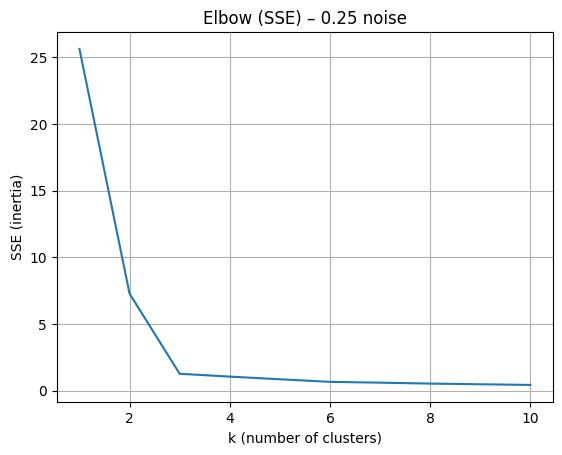

In [25]:
elbow_scree(df0_25,  '0.25 noise')

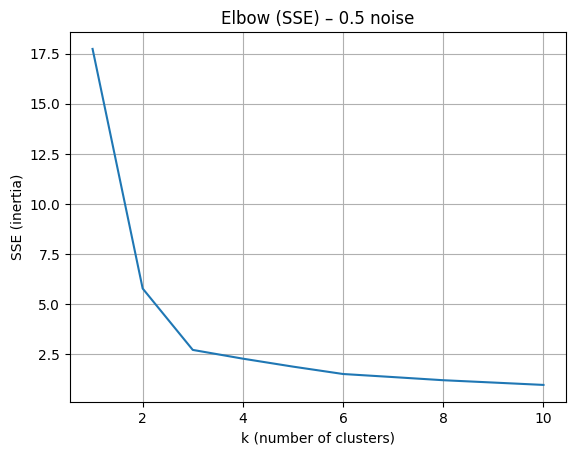

In [26]:
elbow_scree(df0_5,   '0.5 noise')

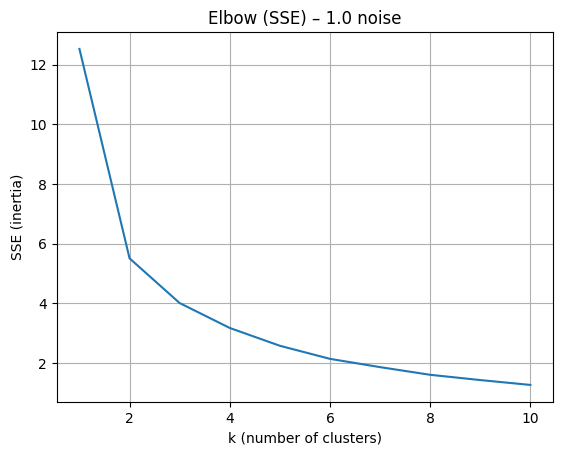

In [27]:
elbow_scree(df1_0,   '1.0 noise')

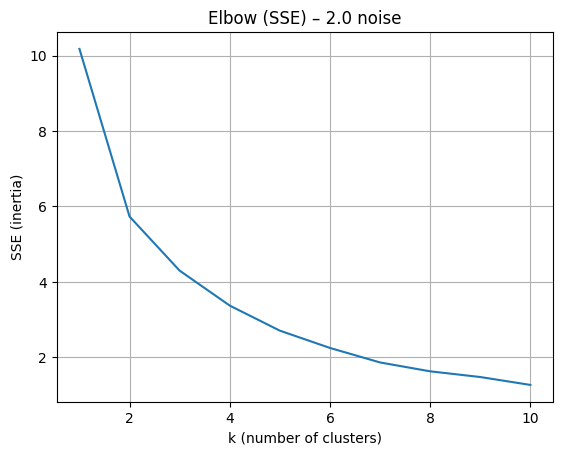

In [28]:
elbow_scree(df2_0,   '2.0 noise')

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?